In [1]:
from matplotlib import rc
%matplotlib notebook
from lmfit import Model
import numpy as np #notwendige Pakete laden
import matplotlib.pyplot as plt
import matplotlib
import math
import matplotlib.ticker as ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator)
import pandas as pd
from PIL import Image
import skimage

In [2]:
matplotlib.use("pgf")
plt.rcParams.update({
    "font.family": "serif",
    "text.usetex": True,
    "pgf.rcfonts": False,
    "figure.figsize": (6.48, 2.75),
    "pgf.texsystem": "pdflatex",
    "font.size": 13,
    "text.latex.preamble" :  r"\usepackage[utf8]{inputenc}  \usepackage[T1]{fontenc} \usepackage[ngerman]{babel} \usepackage[sorting=none]{biblatex} \usepackage{hyperref} \usepackage{amsmath} \usepackage[output-decimal-marker={,}]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    "pgf.preamble": r"\usepackage[utf8]{inputenc} \usepackage[T1]{fontenc} \usepackage[ngerman]{babel} \usepackage{hyperref} \usepackage[sorting=none]{biblatex} \usepackage{amsmath} \usepackage[output-decimal-marker={,}]{siunitx} \sisetup{per-mode=fraction, separate-uncertainty = true, locale = DE} \usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}",
    #r"\usepackage[acronym, toc, section=section, nonumberlist, nopostdot]{glossaries-extra}"])
})

In [3]:
import matplotlib.ticker

class OOMFormatter(matplotlib.ticker.ScalarFormatter):
    def __init__(self, order=0, fformat="%1.1f", offset=True, mathText=True):
        self.oom = order
        self.fformat = fformat
        matplotlib.ticker.ScalarFormatter.__init__(self,useOffset=offset,useMathText=mathText)
    def _set_order_of_magnitude(self):
        self.orderOfMagnitude = self.oom
    def _set_format(self):
        self.format = self.fformat
        if self._useMathText:
            self.format = '$%s$' % ('\\mathdefault{%s}' % self.format)
    

In [4]:
import os
from matplotlib.patches import Ellipse


In [5]:
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator, NullLocator, LogLocator,FormatStrFormatter, FuncFormatter)

In [6]:
from skimage.io import imread

In [7]:
data_path = 'bachelorarbeit/220501_pictures/scattering/'

# Resonance

In [9]:
lognorm = matplotlib.colors.LogNorm(1,500)

In [8]:
th_150_path = data_path + 'th_150_resonance'
th_150_resonant = [imread(os.path.join(th_150_path, img_path)) for img_path in os.listdir(th_150_path)]
th_150_resonant.sort(key=lambda x:x.sum())
print(os.listdir(th_150_path))

['single_count_mask_only_th_150_sum_50000.tiff', 'single_count_mask_only_th_150_sum_20000.tiff', 'single_count_mask_only_th_150_sum_5000.tiff', 'single_count_mask_only_th_150_sum_1000.tiff', 'single_count_mask_only_th_150_sum_10000.tiff', 'single_count_mask_only_th_150_sum_2000.tiff']


<IPython.core.display.Javascript object>


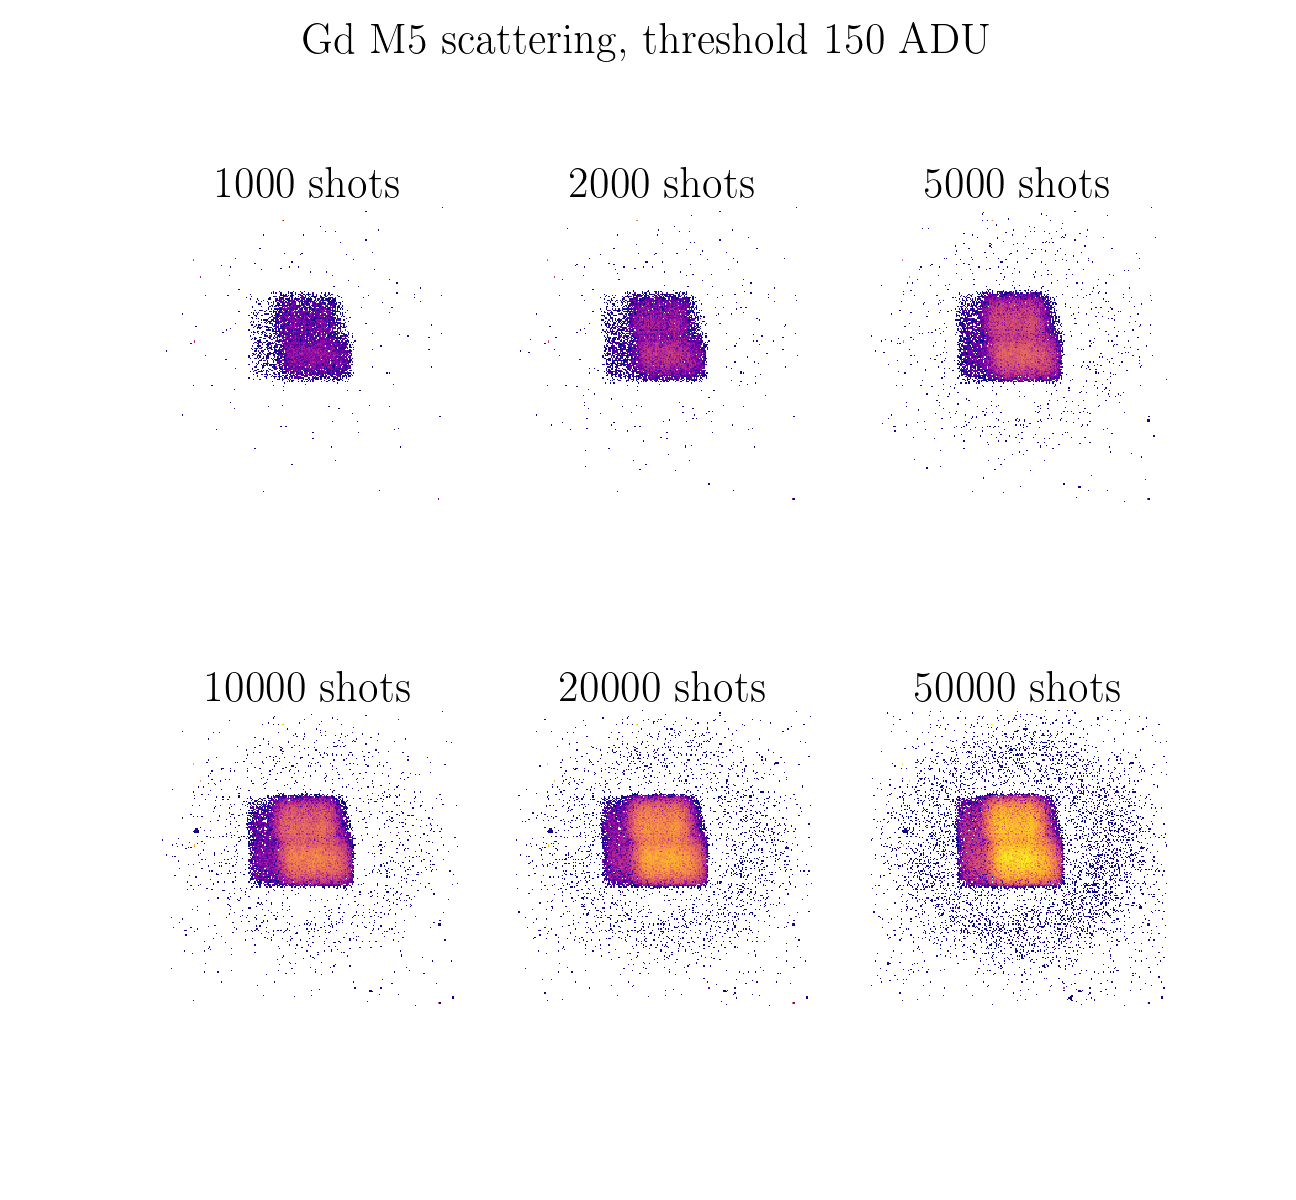

In [10]:
%matplotlib notebook
#grob

fig = plt.figure(figsize=(6.48,6))
fig.suptitle('Gd M5 scattering, threshold 150 ADU')
#fig.suptitle('MOENCH detector characteristics')
#axes.set_title('Soft X-Ray Range')
#cmap.set_bad('w', 1.)
pulses = [1000, 2000, 5000, 10000, 20000, 50000]
for i in range(0,6):
    axe = fig.add_subplot(2,3,i+1)
    axe.set_title(f'{pulses[i]} shots')
    axe.axis('off')
    axe.set_xticks([]) 
    axe.set_yticks([])
    cmap = matplotlib.cm.get_cmap('plasma').copy()
    graph = th_150_resonant[i].astype(np.float64)
    graph[th_150_resonant[i] == 0] = np.nan
    im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)
#fig.colorbar(im, orientation='horizontal', fraction=0.043, pad=0.04, ax=axes, format=FuncFormatter(lambda x, pos: r"%d" % x if x != 0 else "0"))

#fig.savefig('test_ring.png', dpi=300, transparent=False)

In [16]:
th_150_path = data_path + 'th_150_200_resonance'
th_150_resonant = [imread(os.path.join(th_150_path, img_path)) for img_path in os.listdir(th_150_path)]
th_150_resonant.sort(key=lambda x:x.sum())
print(os.listdir(th_150_path))

['single_count_mask_only_th_150_200_sum_2000.tiff', 'single_count_mask_only_th_150_200_sum_1000.tiff', 'single_count_mask_only_th_150_200_sum_10000.tiff', 'single_count_mask_only_th_150_200_sum_5000.tiff', 'single_count_mask_only_th_150_200_sum_50000.tiff', 'single_count_mask_only_th_150_200_sum_20000.tiff']


<IPython.core.display.Javascript object>


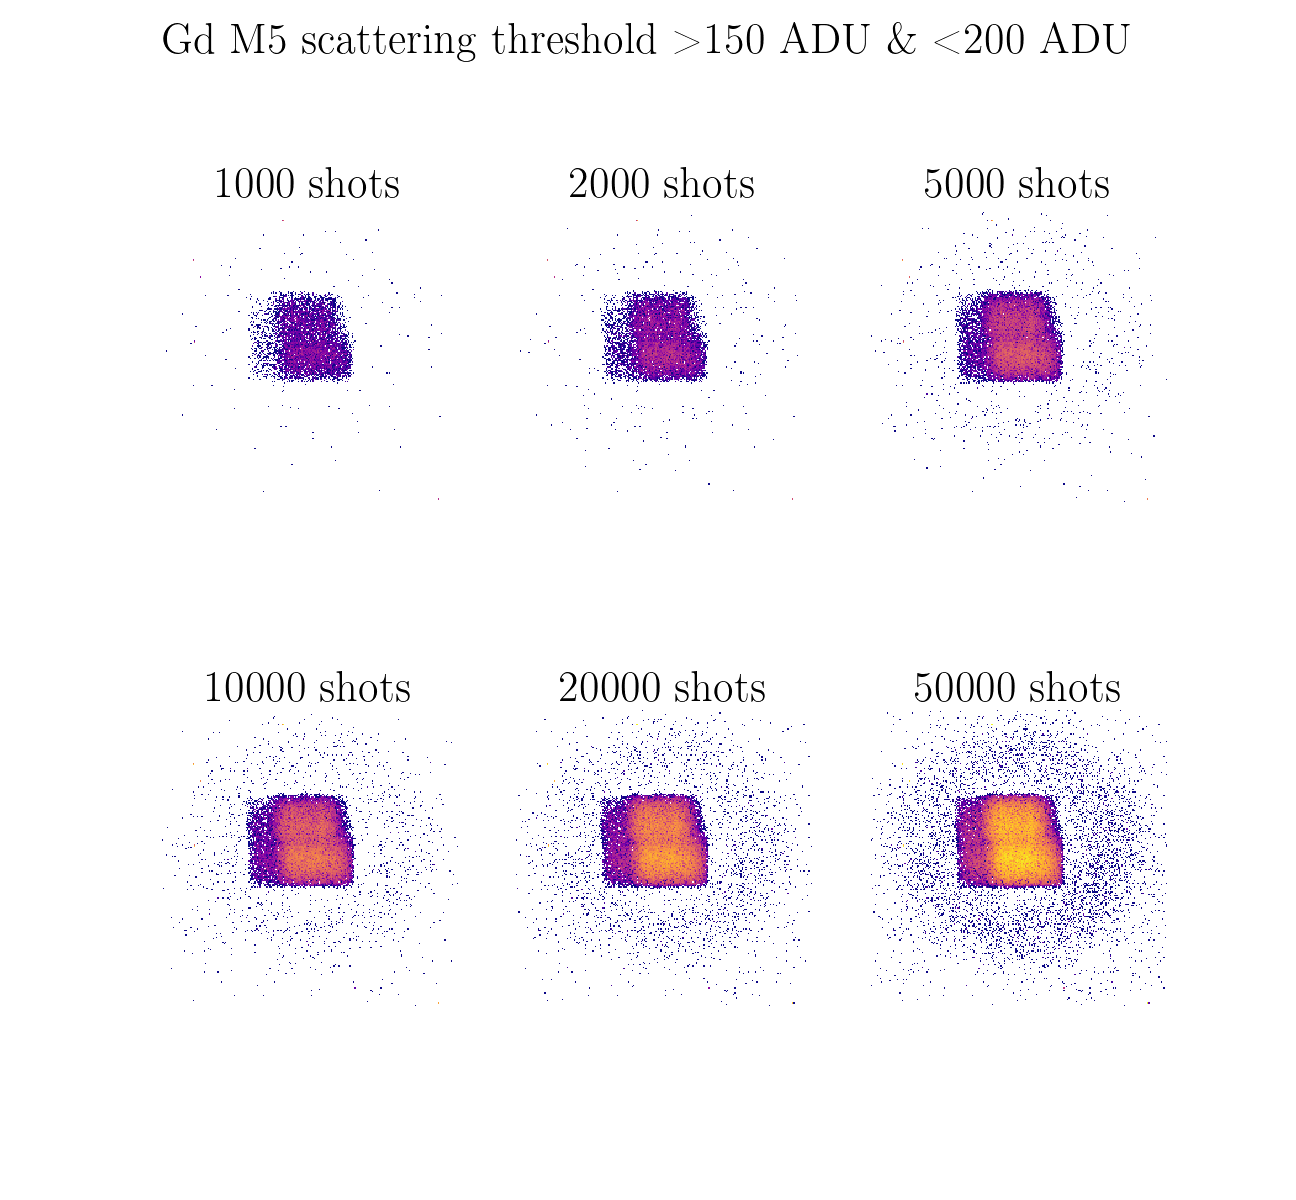

In [17]:
%matplotlib notebook
#grob

fig = plt.figure(figsize=(6.48,6))
fig.suptitle('Gd M5 scattering threshold >150 ADU \& <200 ADU')
#fig.suptitle('MOENCH detector characteristics')
#axes.set_title('Soft X-Ray Range')
#cmap.set_bad('w', 1.)
pulses = [1000, 2000, 5000, 10000, 20000, 50000]
for i in range(0,6):
    axe = fig.add_subplot(2,3,i+1)
    axe.set_title(f'{pulses[i]} shots')
    axe.axis('off')
    axe.set_xticks([]) 
    axe.set_yticks([])
    cmap = matplotlib.cm.get_cmap('plasma').copy()
    graph = th_150_resonant[i].astype(np.float64)
    graph[th_150_resonant[i] == 0] = np.nan
    im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)
#fig.colorbar(im, orientation='horizontal', fraction=0.043, pad=0.04, ax=axes, format=FuncFormatter(lambda x, pos: r"%d" % x if x != 0 else "0"))

#fig.savefig('test_ring.png', dpi=300, transparent=False)

In [10]:
th_150_path = data_path + 'th_150_180_resonance'
th_150_resonant = [imread(os.path.join(th_150_path, img_path)) for img_path in os.listdir(th_150_path)]
th_150_resonant.sort(key=lambda x:x.sum())
print(os.listdir(th_150_path))

['single_count_mask_only_th_150_180_sum_5000.tiff', 'single_count_mask_only_th_150_180_sum_20000.tiff', 'single_count_mask_only_th_150_180_sum_50000.tiff', 'single_count_mask_only_th_150_180_sum_10000.tiff', 'single_count_mask_only_th_150_180_sum_2000.tiff', 'single_count_mask_only_th_150_180_sum_1000.tiff']


<IPython.core.display.Javascript object>


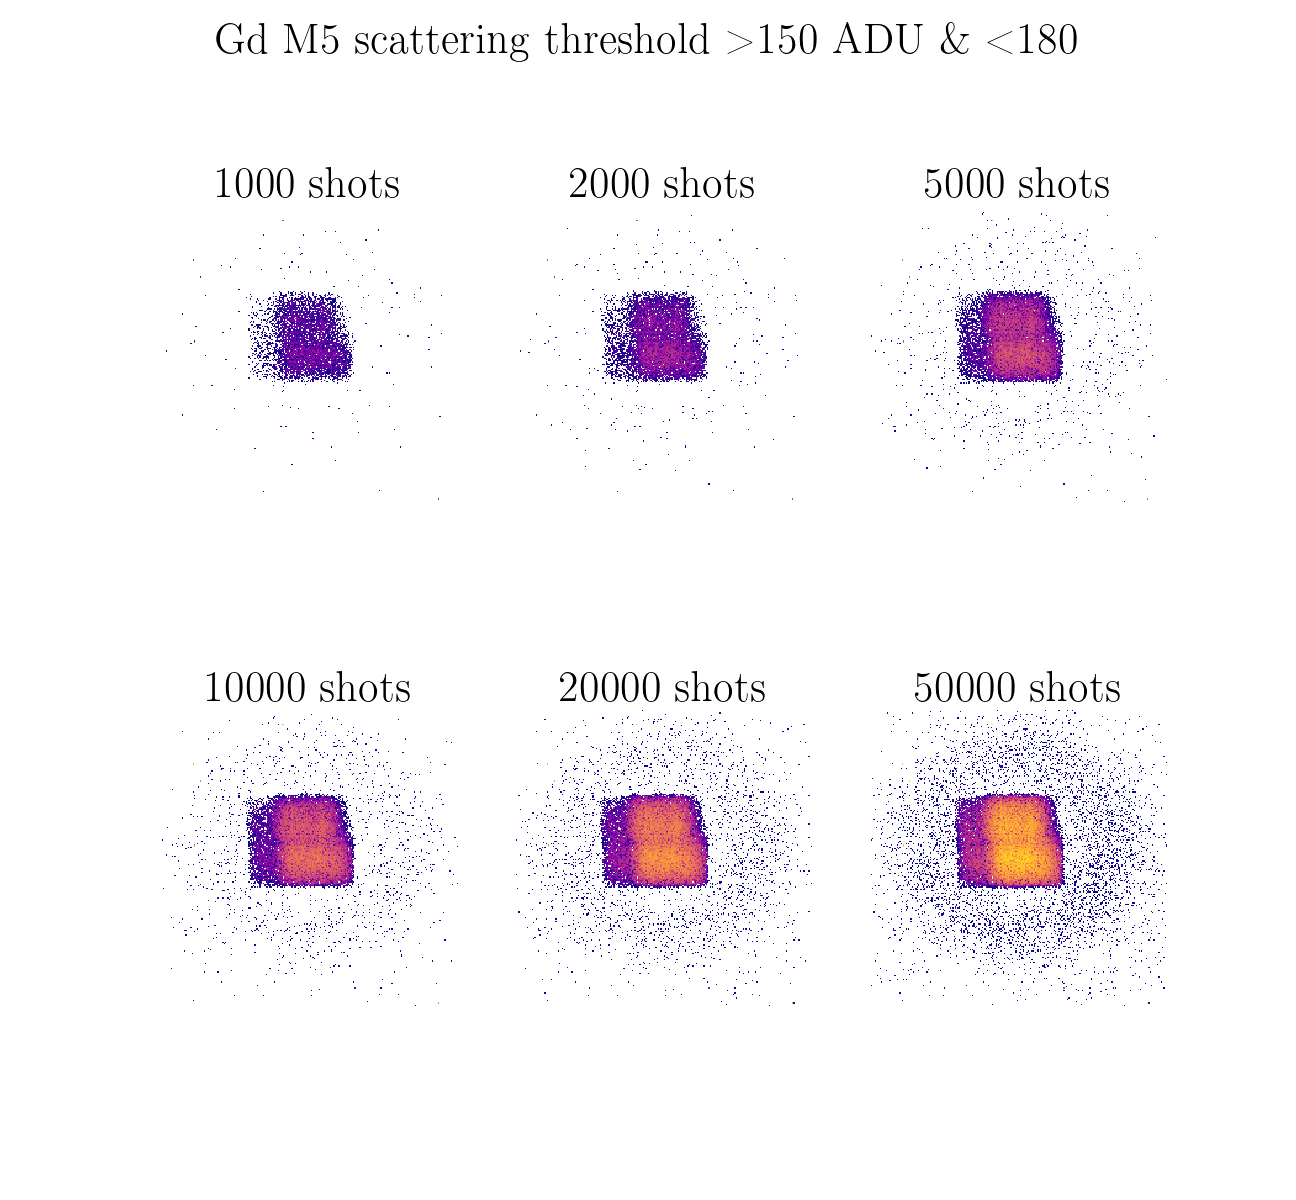

In [15]:
%matplotlib notebook
#grob

fig = plt.figure(figsize=(6.48,6))
fig.suptitle('Gd M5 scattering threshold >150 ADU \& <180 ADU')
#fig.suptitle('MOENCH detector characteristics')
#axes.set_title('Soft X-Ray Range')
#cmap.set_bad('w', 1.)
pulses = [1000, 2000, 5000, 10000, 20000, 50000]
for i in range(0,6):
    axe = fig.add_subplot(2,3,i+1)
    axe.set_title(f'{pulses[i]} shots')
    axe.axis('off')
    axe.set_xticks([]) 
    axe.set_yticks([])
    cmap = matplotlib.cm.get_cmap('plasma').copy()
    graph = th_150_resonant[i].astype(np.float64)
    graph[th_150_resonant[i] == 0] = np.nan
    im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)
#fig.colorbar(im, orientation='horizontal', fraction=0.043, pad=0.04, ax=axes, format=FuncFormatter(lambda x, pos: r"%d" % x if x != 0 else "0"))

#fig.savefig('test_ring.png', dpi=300, transparent=False)

In [11]:
th_180_path = data_path + 'th_180_resonance'
th_180_resonant = [imread(os.path.join(th_180_path, img_path)) for img_path in os.listdir(th_180_path)]
th_180_resonant.sort(key=lambda x:x.sum())
print(os.listdir(th_180_path))

['single_count_mask_only_th_180_sum_5000.tiff', 'single_count_mask_only_th_180_sum_10000.tiff', 'single_count_mask_only_th_180_sum_2000.tiff', 'single_count_mask_only_th_180_sum_20000.tiff', 'single_count_mask_only_th_180_sum_1000.tiff', 'single_count_mask_only_th_180_sum_50000.tiff']


<IPython.core.display.Javascript object>


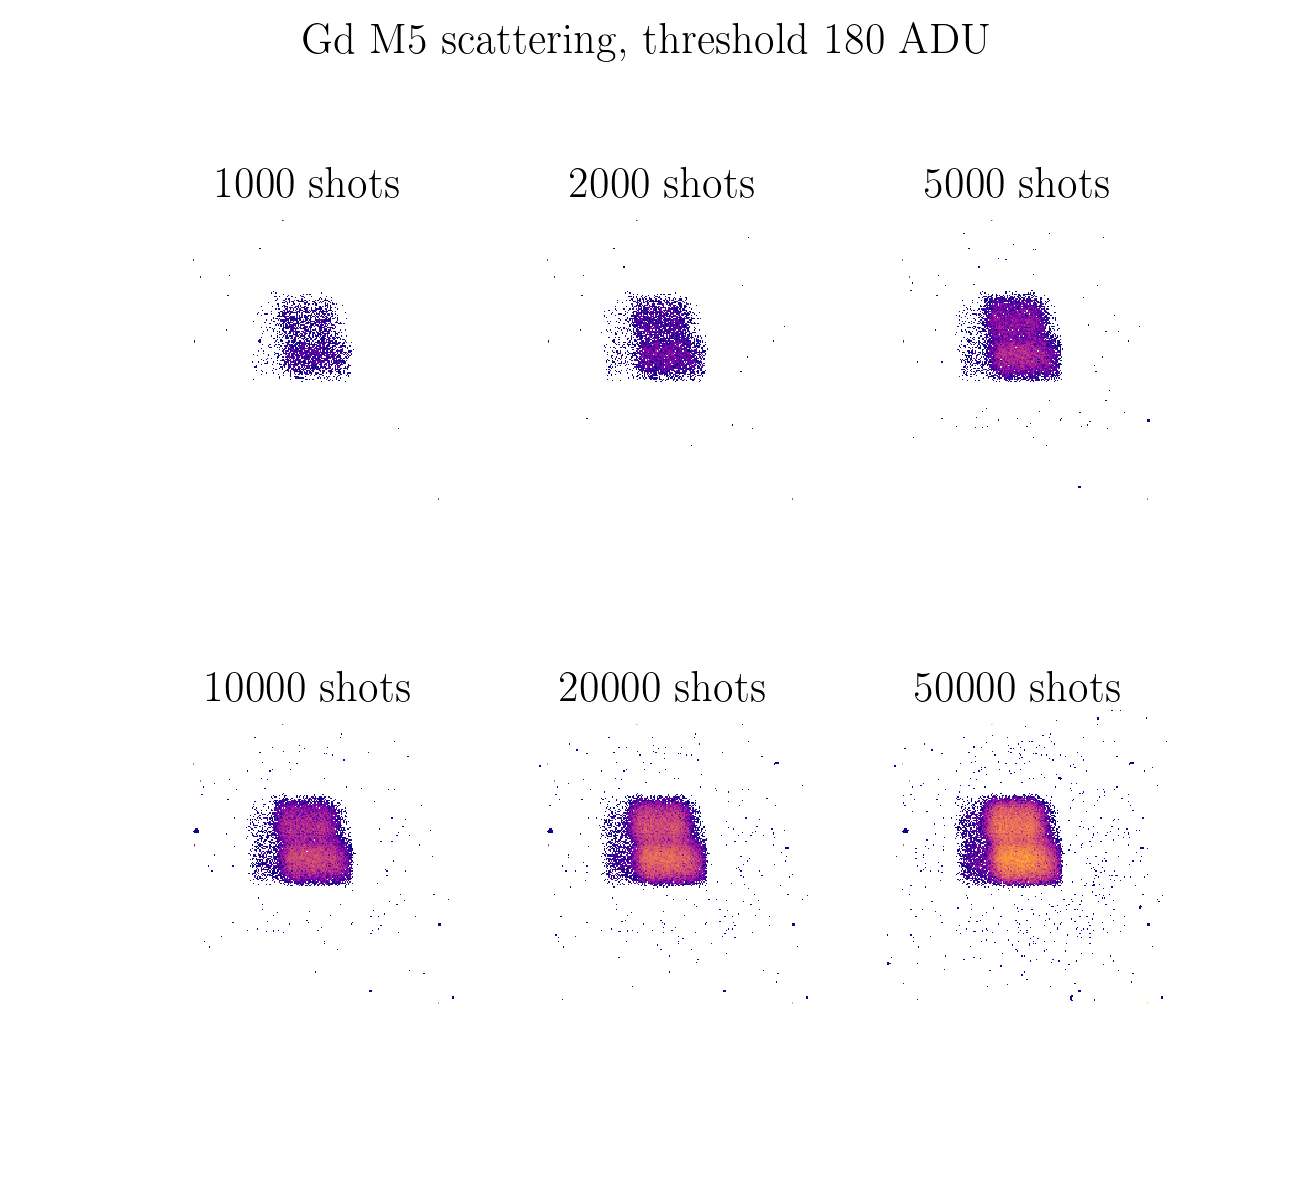

In [12]:
%matplotlib notebook
#grob

fig = plt.figure(figsize=(6.48,6))
fig.suptitle('Gd M5 scattering, threshold 180 ADU')
#fig.suptitle('MOENCH detector characteristics')
#axes.set_title('Soft X-Ray Range')
#cmap.set_bad('w', 1.)
pulses = [1000, 2000, 5000, 10000, 20000, 50000]
for i in range(0,6):
    axe = fig.add_subplot(2,3,i+1)
    axe.set_title(f'{pulses[i]} shots')
    axe.axis('off')
    axe.set_xticks([]) 
    axe.set_yticks([])
    cmap = matplotlib.cm.get_cmap('plasma').copy()
    graph = th_180_resonant[i].astype(np.float64)
    graph[th_180_resonant[i] == 0] = np.nan
    im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)
#fig.colorbar(im, orientation='horizontal', fraction=0.043, pad=0.04, ax=axes, format=FuncFormatter(lambda x, pos: r"%d" % x if x != 0 else "0"))

#fig.savefig('test_ring.png', dpi=300, transparent=False)

<IPython.core.display.Javascript object>


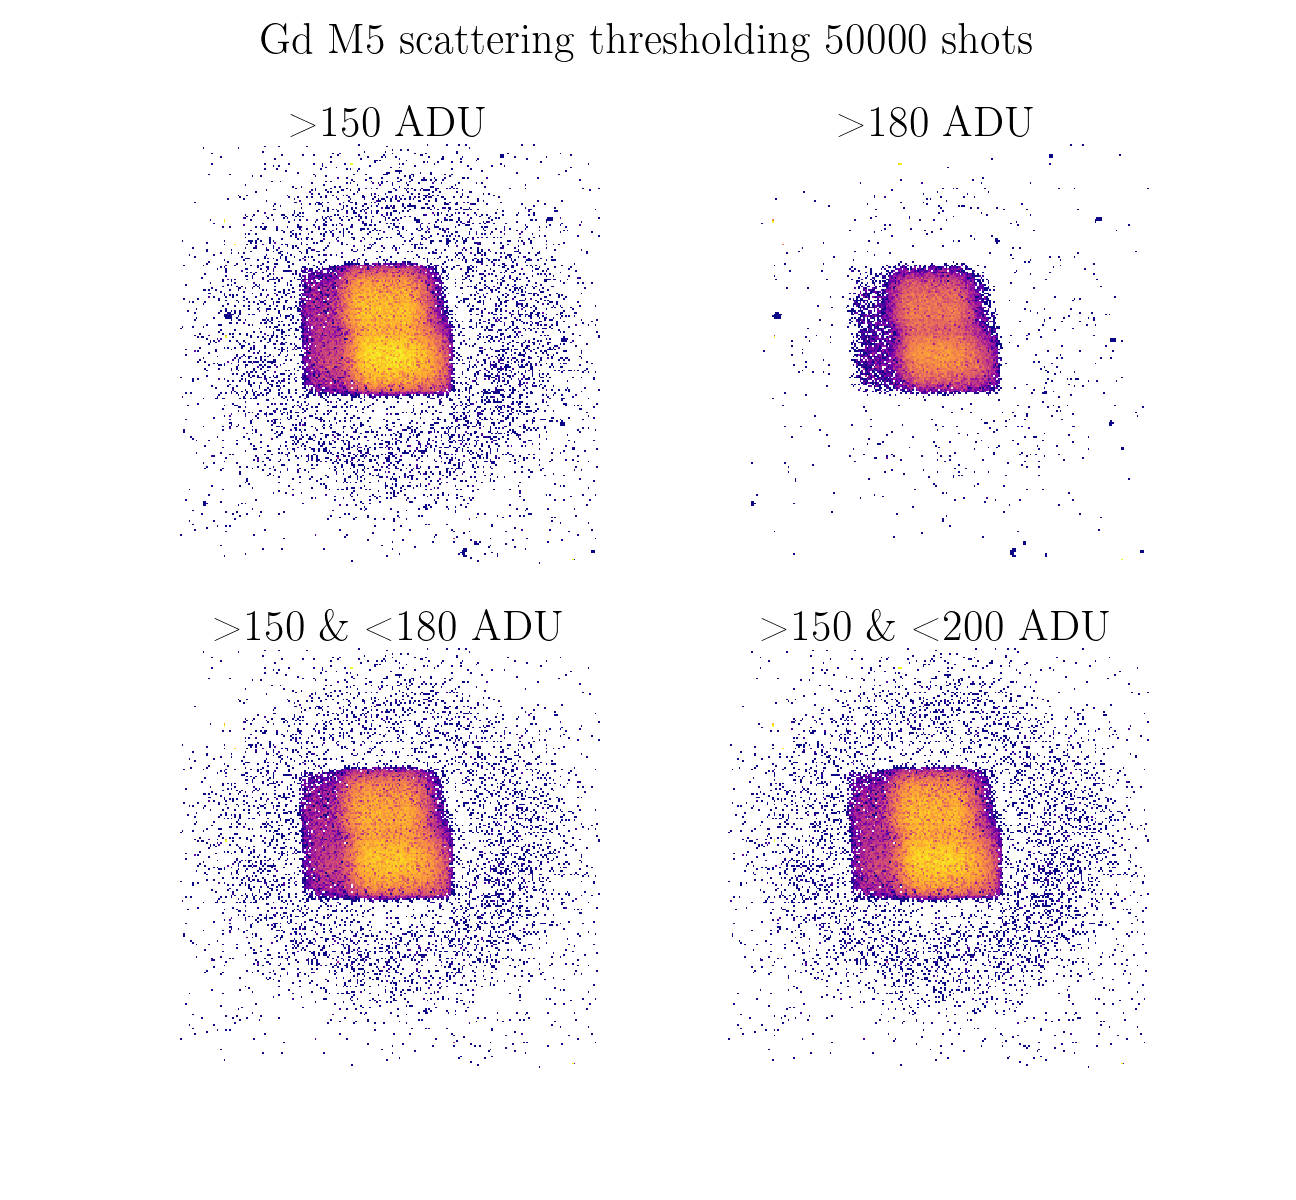

In [20]:
%matplotlib notebook
#grob

fig = plt.figure(figsize=(6.48,6))
fig.suptitle('Gd M5 scattering thresholding 50000 shots')
#fig.suptitle('MOENCH detector characteristics')
#axes.set_title('Soft X-Ray Range')
#cmap.set_bad('w', 1.)

axe = fig.add_subplot(2,2,1)
image = imread(data_path + 'th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
axe.set_title(f'>150 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
cmap = matplotlib.cm.get_cmap('plasma').copy()
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)
               
axe = fig.add_subplot(2,2,2)
image = imread(data_path + 'th_180_resonance/single_count_mask_only_th_180_sum_50000.tiff')
axe.set_title(f'>180 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
cmap = matplotlib.cm.get_cmap('plasma').copy()
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,3)
image = imread(data_path + 'th_150_180_resonance/single_count_mask_only_th_150_180_sum_50000.tiff')
axe.set_title(f'>150 \& <180 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
cmap = matplotlib.cm.get_cmap('plasma').copy()
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)
               
axe = fig.add_subplot(2,2,4)
image = imread(data_path + 'th_150_200_resonance/single_count_mask_only_th_150_200_sum_50000.tiff')
axe.set_title(f'>150 \& <200 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
cmap = matplotlib.cm.get_cmap('plasma').copy()
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

In [44]:
def select_callback(eclick, erelease):
    """
    Callback for line selection.

    *eclick* and *erelease* are the press and release events.
    """
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    print(f"({x1:3.2f}, {y1:3.2f}) --> ({x2:3.2f}, {y2:3.2f})")
    print(f"The buttons you used were: {eclick.button} {erelease.button}")


def toggle_selector(event):
    print('Key pressed.')
    if event.key == 't':
        for selector in selectors:
            name = type(selector).__name__
            if selector.active:
                print(f'{name} deactivated.')
                selector.set_active(False)
            else:
                print(f'{name} activated.')
                selector.set_active(True)
from matplotlib.widgets import EllipseSelector, RectangleSelector


<IPython.core.display.Javascript object>


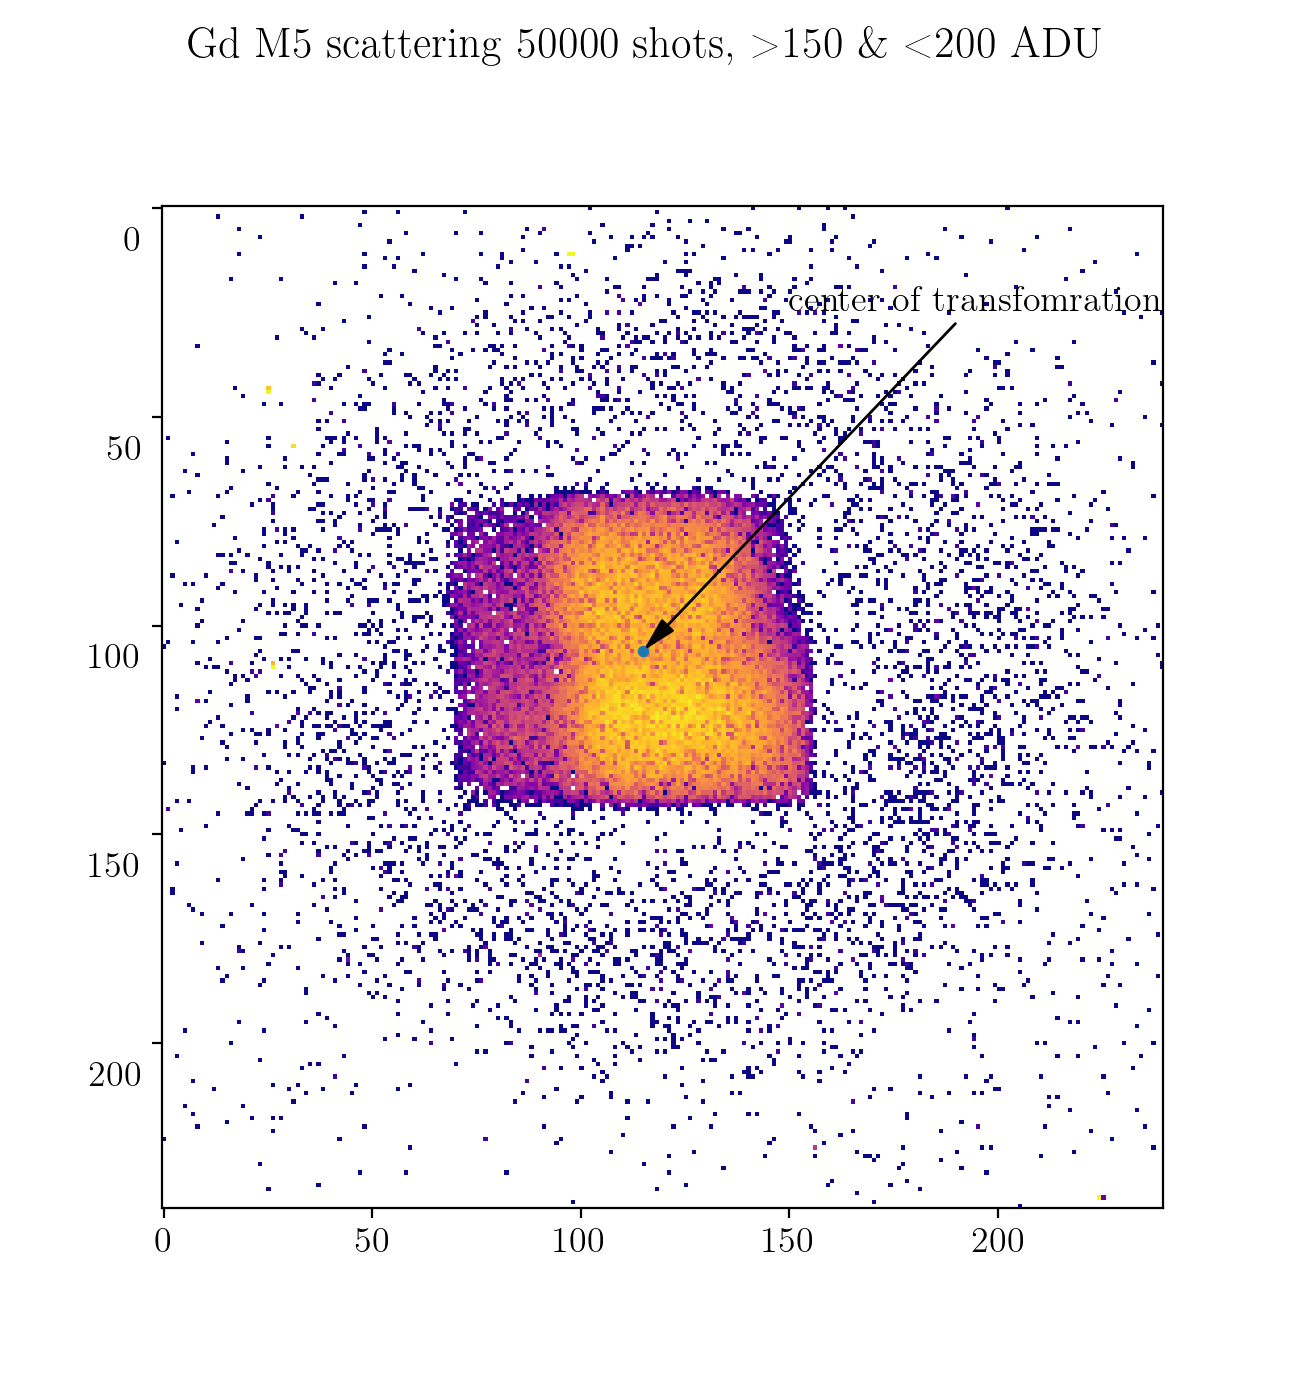

Text(150, 10, 'center of transfomration')

In [132]:
%matplotlib notebook
plt.rcParams["figure.figsize"] = (6.46,7)
plt.suptitle('Gd M5 scattering 50000 shots, >150 \& <200 ADU')
cmap = matplotlib.cm.get_cmap('plasma').copy()
image = imread('bachelorarbeit/220501_pictures/scattering/th_150_200_resonance/single_count_mask_only_th_150_200_sum_50000.tiff')
crop = image[80:320, 80:320]
plt.imshow(crop, norm=lognorm, cmap=cmap, interpolation='none', resample=False)
plt.scatter(115,106, s=10)
#plt.scatter(106, 115, s=10)
prop = dict(arrowstyle="-|>,head_width=0.2,head_length=0.8",
            shrinkA=0,shrinkB=0, fc='k', ec='k')

plt.annotate("center of transfomration", (115,106),(150, 10),arrowprops=prop)

<IPython.core.display.Javascript object>


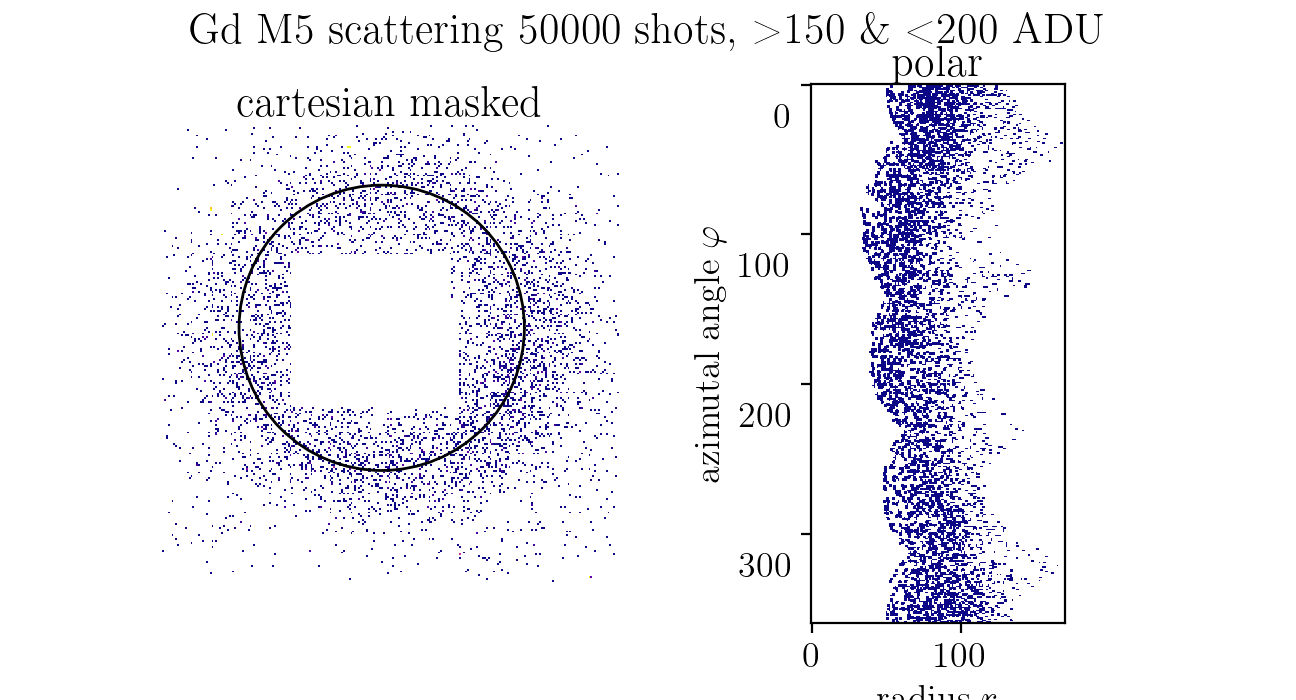

In [135]:
%matplotlib notebook
selectors = []

fig = plt.figure(figsize=(6.48,3.5))
fig.suptitle('Gd M5 scattering 50000 shots, >150 \& <200 ADU')
cmap = matplotlib.cm.get_cmap('plasma').copy()
image = imread('bachelorarbeit/220501_pictures/scattering/th_150_200_resonance/single_count_mask_only_th_150_200_sum_50000.tiff')
image_masked = np.array(image)
image_masked = image_masked[80:320, 80:320]
#image_masked[8] = 0
image_masked[68:148,68:152] = 0
image_masked[91:152,150:156] = 0

axe = fig.add_subplot(1,2,1)
axe.set_title('cartesian masked')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
ellipse = Ellipse((109,105), 208.5, 191, fill=False, color = 'red')
selectors.append(EllipseSelector(
        axe, select_callback,
        useblit=True,
        button=[1, 3],  # disable middle button
        minspanx=5, minspany=5,
        spancoords='pixels',
        interactive=True))
fig.canvas.mpl_connect('key_press_event', toggle_selector)
    
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(image_masked, norm=lognorm, cmap=cmap, interpolation='none', resample=False)
ellipse = Ellipse((115,106), 2*75, 2*75, fill=False)

axe.add_patch(ellipse)

image_polar = skimage.transform.warp_polar(image_masked,center=(115, 106))

axe = fig.add_subplot(1,2,2)
axe.set_title('polar')
axe.set_xlabel('radius $r$')
axe.set_ylabel('azimutal angle $\\varphi$')
graph = image_polar.astype(np.float64)
graph[image_polar == 0] = np.nan
im = axe.imshow(graph, norm=lognorm, cmap=cmap, interpolation='none', resample=False)

# axe = fig.add_subplot(1,2,3)
# axe.set_title('integration')
# axe.set_xlabel('radius $r$')
# axe.set_ylabel('intensity')
# axe.plot(range(0,283),image_polar.sum(axis=0))

In [113]:
Ellipse?

In [49]:
selectors[0].center

(115.32362604540023, 106.18533452807642)

In [81]:
import lmfit
from lmfit.models import GaussianModel

<IPython.core.display.Javascript object>


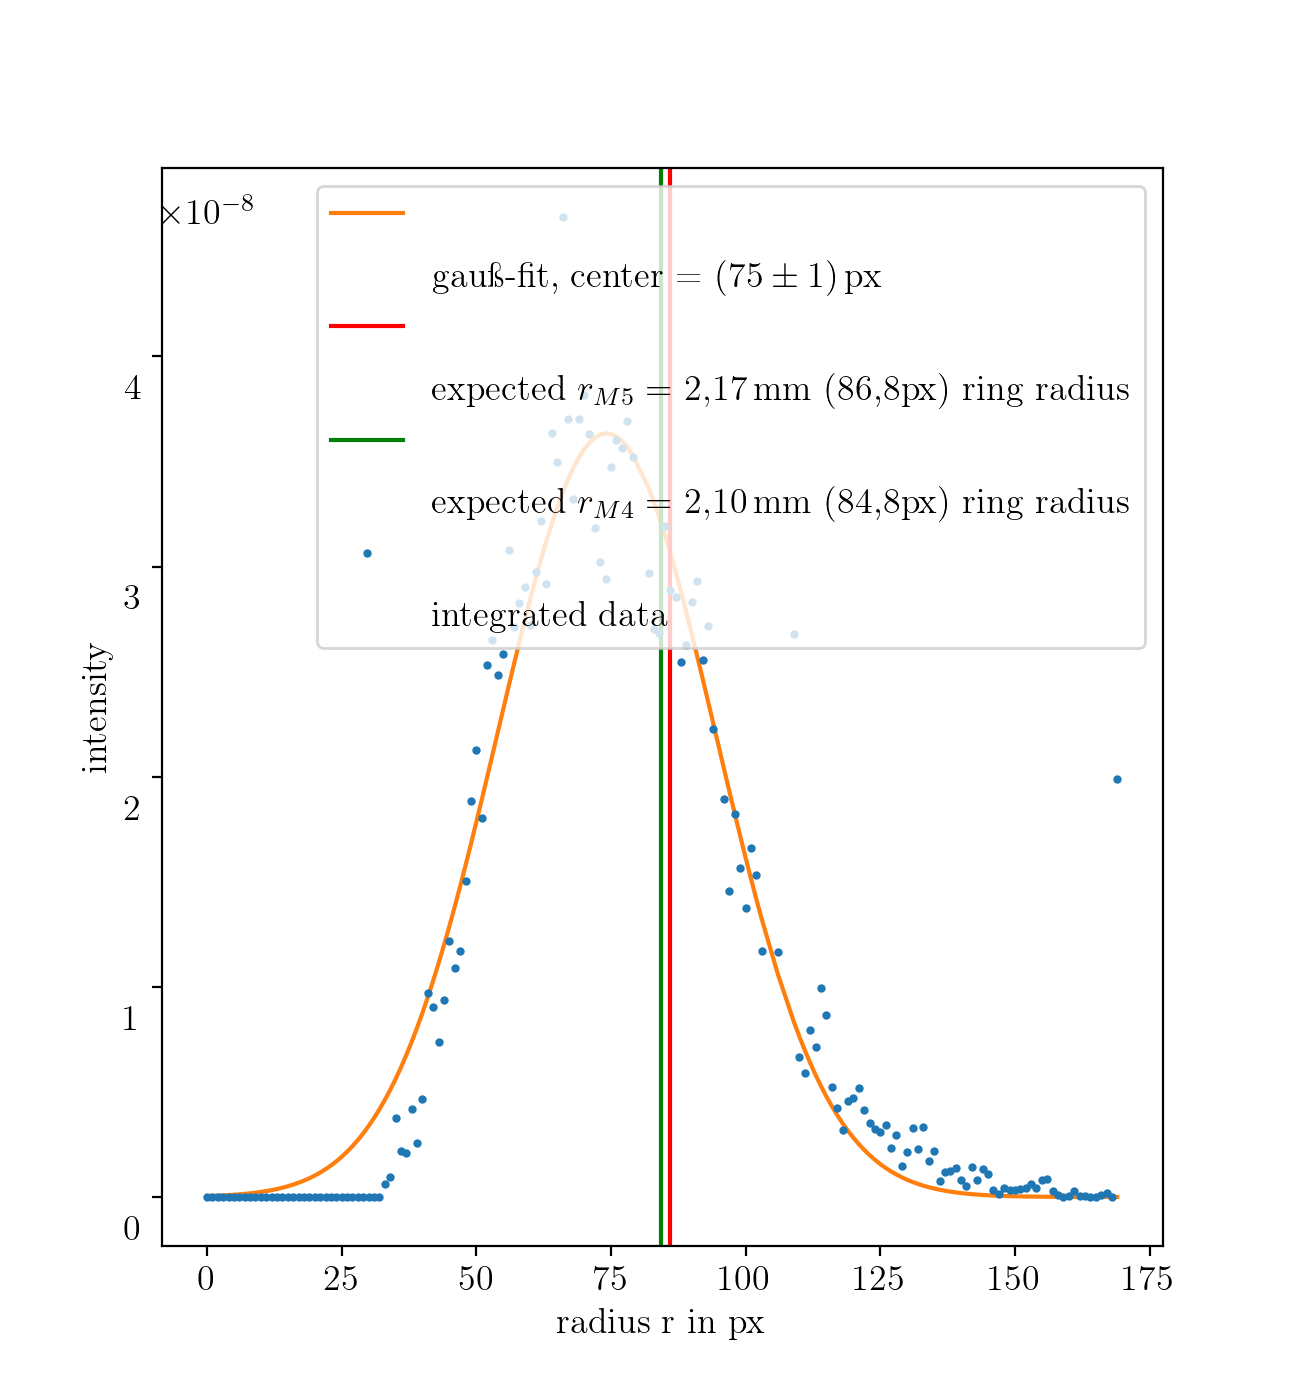

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 163
    # variables        = 3
    chi-square         = 1.7502e-15
    reduced chi-square = 1.0939e-17
    Akaike info crit   = -6362.86307
    Bayesian info crit = -6353.58182
[[Variables]]
    amplitude:  1.8461e-06 +/- 3.5989e-08 (1.95%) (init = 3.987394e-06)
    center:     74.1785191 +/- 0.45475332 (0.61%) (init = 73)
    sigma:      20.2659721 +/- 0.45819923 (2.26%) (init = 28.5)
    fwhm:       47.7227164 +/- 1.07897673 (2.26%) == '2.3548200*sigma'
    height:     3.6341e-08 +/- 7.0216e-10 (1.93%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.588


In [136]:
%matplotlib notebook
mod = GaussianModel()
plt.rcParams["figure.figsize"] = (6.46,7)
azimutal_integrated = image_polar.sum(axis=0)
azimutal_integrated = [:169]
args = np.argwhere(azimutal_integrated < 4.729e-8)
radius = np.arange(0,169)
radius_fixed = radius[args][:,0]
azimutal_integrated_fixed= azimutal_integrated[args][:,0]
#plt.plot(radius, azimutal_integrated)
plt.errorbar(radius_fixed, azimutal_integrated_fixed, fmt='o', markersize=2, label='integrated data')
params = mod.guess(x=radius_fixed, data=azimutal_integrated_fixed)
result = mod.fit(azimutal_integrated_fixed, params=params, x=radius_fixed)
print(result.fit_report())
plt.plot(radius_fixed, result.best_fit, label='gauß-fit, center = \\SI{75(1)}{px}')
plt.axvline(86, color = 'red', label='expected $r_{M5} =$ \\SI{2.17}{\\milli\\meter} (86{,}8px) ring radius')
plt.axvline(84.24, color = 'green', label='expected $r_{M4} =$ \\SI{2.10}{\\milli\\meter} (84{,}8px) ring radius')

plt.yscale('linear')
plt.xlabel('radius r in px')
plt.ylabel('intensity')
plt.legend()

In [187]:
from lmfit import Model
def ellipse_degree(x, phase, a,b):
    return np.sqrt(b**2*np.cos((x + phase)/360*(2*np.pi))**2 + a**2*np.sin((x + phase)/360*(2*np.pi))**2)

In [188]:
sin_model = Model(ellipse_degree)
params = sin_model.make_params()
print(params)
params.add('phase', value=0.0, min=-180, max=180,vary=True)
params.add('a', value=7e-9)
params.add('b', value=2.5e-9)
print(params)

Parameters([('phase', <Parameter 'phase', value=-inf, bounds=[-inf:inf]>), ('a', <Parameter 'a', value=-inf, bounds=[-inf:inf]>), ('b', <Parameter 'b', value=-inf, bounds=[-inf:inf]>)])
Parameters([('phase', <Parameter 'phase', value=0.0, bounds=[-180:180]>), ('a', <Parameter 'a', value=7e-09, bounds=[-inf:inf]>), ('b', <Parameter 'b', value=2.5e-09, bounds=[-inf:inf]>)])


<IPython.core.display.Javascript object>


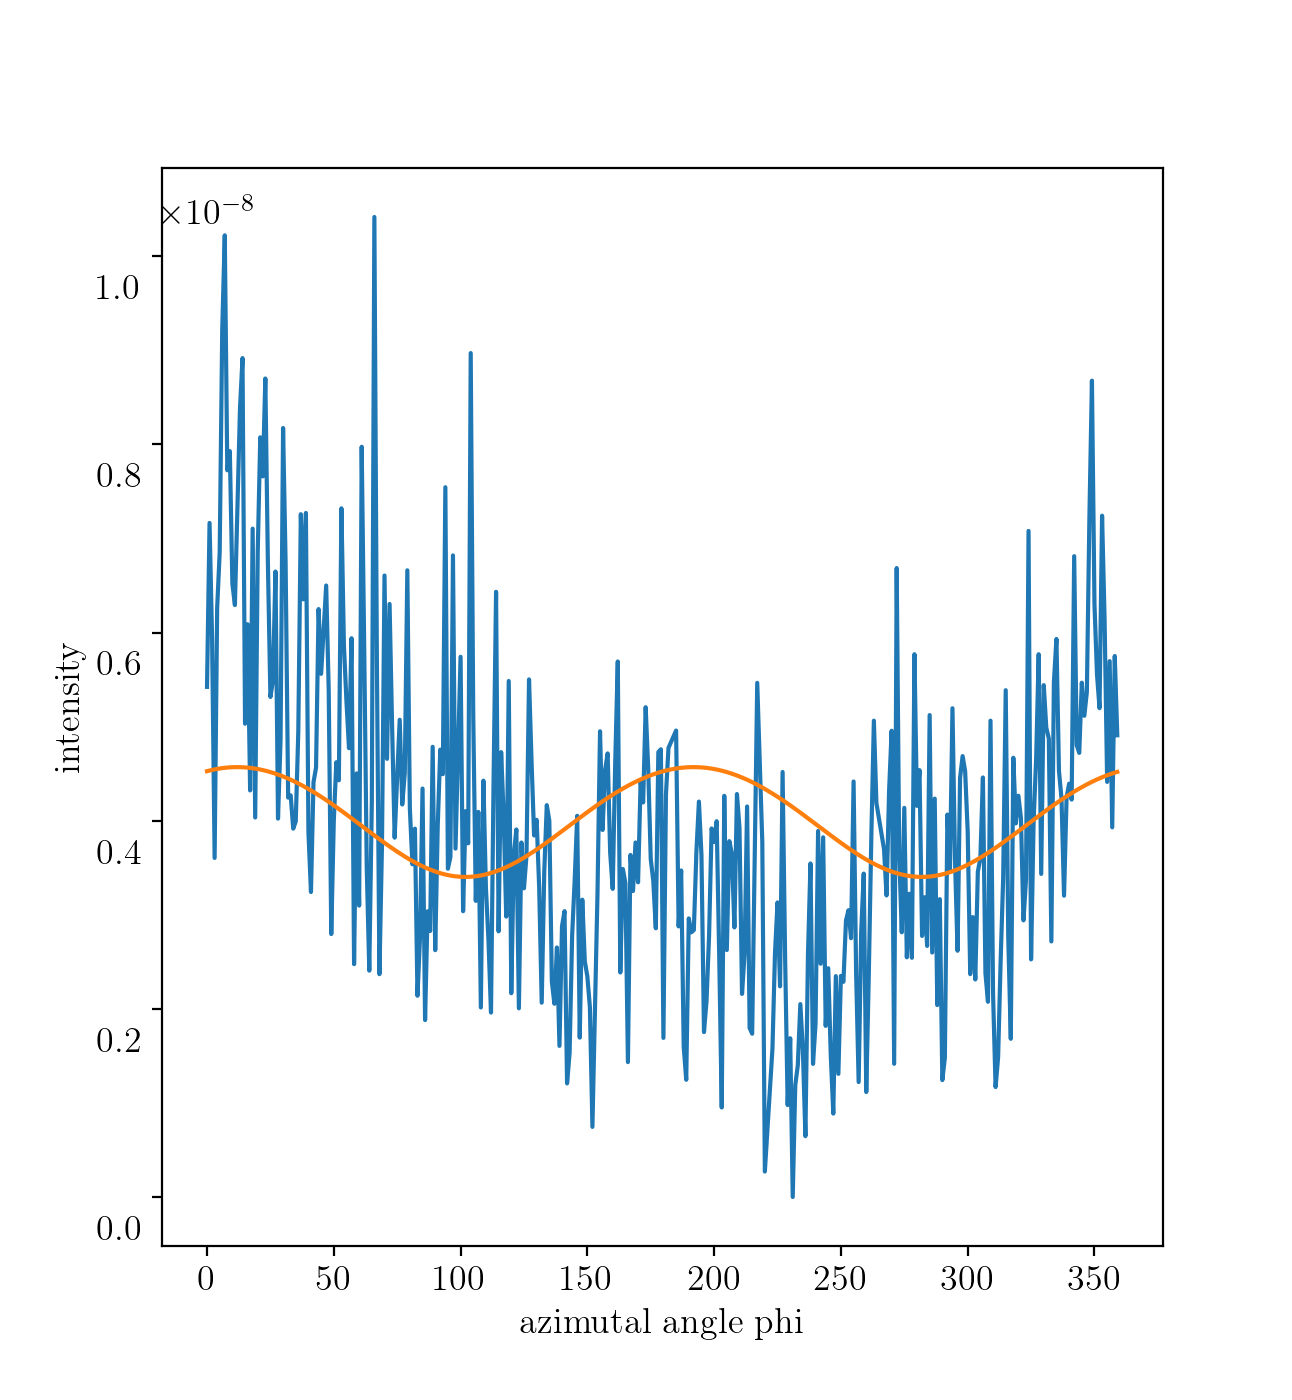

[[Model]]
    Model(ellipse_degree)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 352
    # variables        = 3
    chi-square         = 1.0500e-15
    reduced chi-square = 3.0087e-18
    Akaike info crit   = -14198.4618
    Bayesian info crit = -14186.8709
[[Variables]]
    phase: -11.8750194 +/- 6.40013818 (53.90%) (init = 0)
    a:      3.4025e-09 +/- 1.6847e-10 (4.95%) (init = 7e-09)
    b:      4.5700e-09 +/- 1.5389e-10 (3.37%) (init = 2.5e-09)
[[Correlations]] (unreported correlations are < 0.100)
    C(a, b) = -0.331


Text(0, 0.5, 'intensity')

In [189]:
%matplotlib notebook
N = 1
phi = np.arange(0,360)
y_phi = image_polar.sum(axis=1)
args = np.argwhere(y_phi < 2.19e-8)
y_phi_fixed = y_phi[args][:,0]
phi_fixed = phi[args][:,0]
y_phi_fixed = y_phi_fixed - np.min(y_phi_fixed)
plt.plot(phi_fixed,y_phi_fixed)
result = sin_model.fit(y_phi_fixed, params=params,x=phi_fixed)
print(result.fit_report())
plt.plot(phi_fixed, result.best_fit)
plt.yscale('linear')
plt.xlabel('azimutal angle phi')
plt.ylabel('intensity')

# Clustering

In [13]:
th_180_path = data_path + 'cl_2_th_180_resonance'
th_180_resonant = [imread(os.path.join(th_180_path, img_path)) for img_path in os.listdir(th_180_path)]
th_180_resonant.sort(key=lambda x:x.sum())
print(os.listdir(th_180_path))

['single_count_mask_cl_2_th_180_sum_5000.tiff', 'single_count_mask_cl_2_th_180_sum_20000.tiff', 'single_count_mask_cl_2_th_180_sum_50000.tiff', 'single_count_mask_cl_2_th_180_sum_2000.tiff', 'single_count_mask_cl_2_th_180_sum_10000.tiff', 'single_count_mask_cl_2_th_180_sum_1000.tiff']


<IPython.core.display.Javascript object>


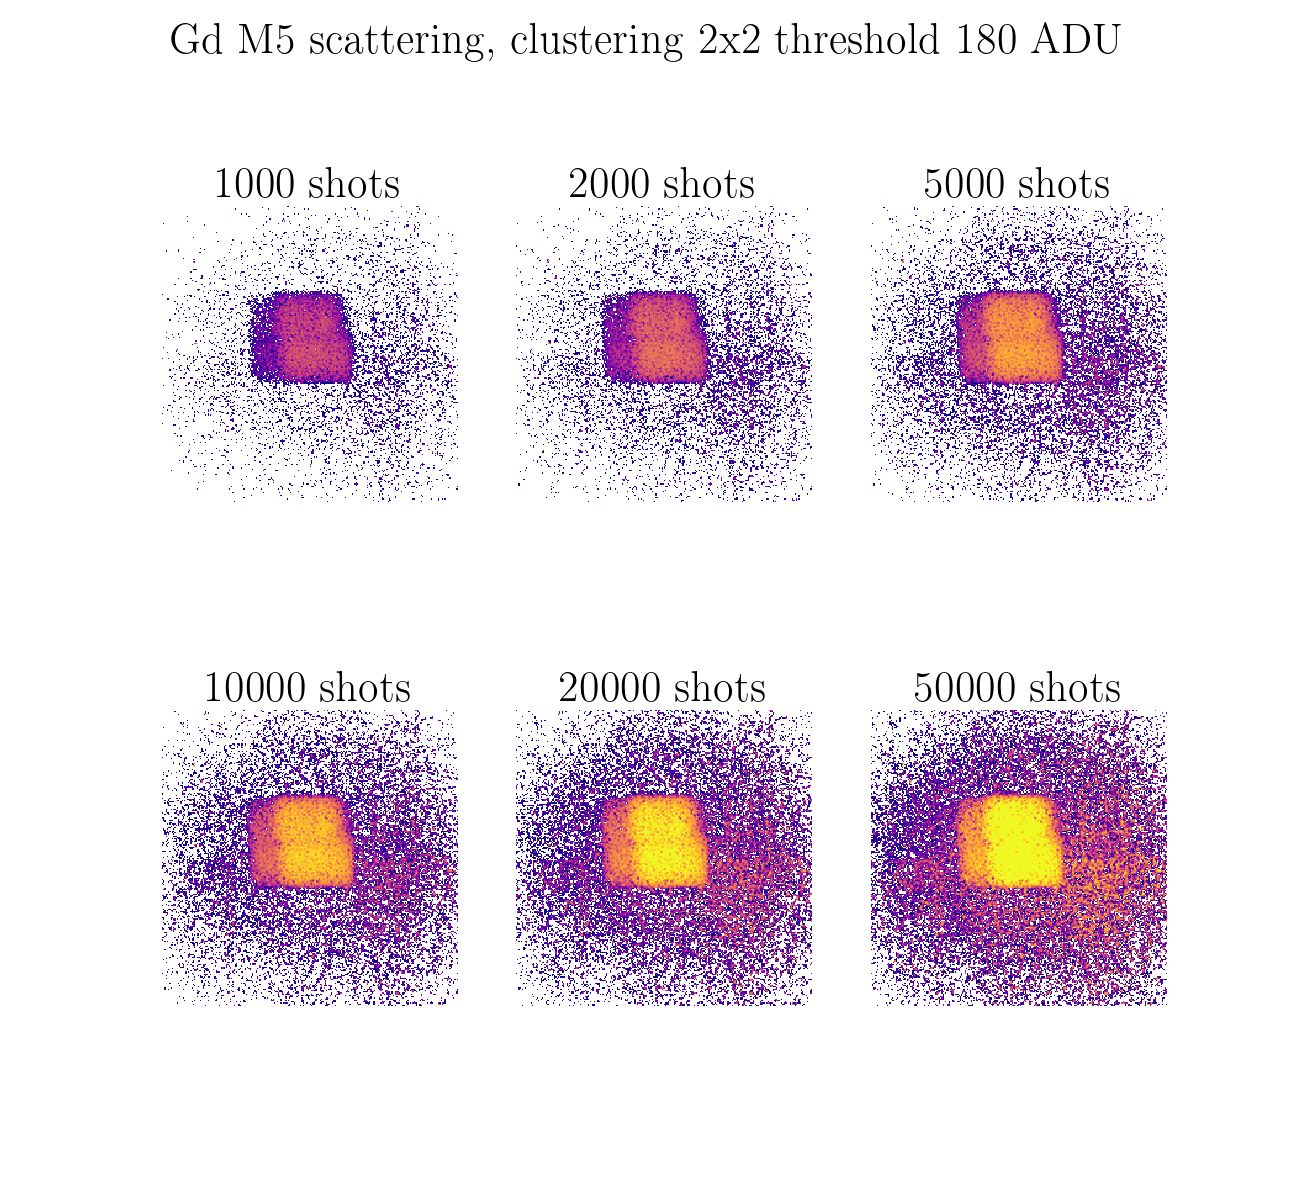

In [15]:
%matplotlib notebook
#grob

fig = plt.figure(figsize=(6.48,6))
fig.suptitle('Gd M5 scattering, clustering 2x2 threshold 180 ADU')
#fig.suptitle('MOENCH detector characteristics')
#axes.set_title('Soft X-Ray Range')
#cmap.set_bad('w', 1.)
for i in range(0,6):
    axe = fig.add_subplot(2,3,i+1)
    axe.set_title(f'{pulses[i]} shots')
    axe.axis('off')
    axe.set_xticks([]) 
    axe.set_yticks([])
    cmap = matplotlib.cm.get_cmap('plasma').copy()
    graph = th_180_resonant[i].astype(np.float64)
    graph[th_180_resonant[i] == 0] = np.nan
    im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)
#fig.colorbar(im, orientation='horizontal', fraction=0.043, pad=0.04, ax=axes, format=FuncFormatter(lambda x, pos: r"%d" % x if x != 0 else "0"))

#fig.savefig('test_ring.png', dpi=300, transparent=False)

In [17]:
th_200_path = data_path + 'cl_2_th_200_resonance'
th_200_resonant = [imread(os.path.join(th_200_path, img_path)) for img_path in os.listdir(th_200_path)]
th_200_resonant.sort(key=lambda x:x.sum())
print(os.listdir(th_180_path))

['single_count_mask_cl_2_th_180_sum_5000.tiff', 'single_count_mask_cl_2_th_180_sum_20000.tiff', 'single_count_mask_cl_2_th_180_sum_50000.tiff', 'single_count_mask_cl_2_th_180_sum_2000.tiff', 'single_count_mask_cl_2_th_180_sum_10000.tiff', 'single_count_mask_cl_2_th_180_sum_1000.tiff']


<IPython.core.display.Javascript object>


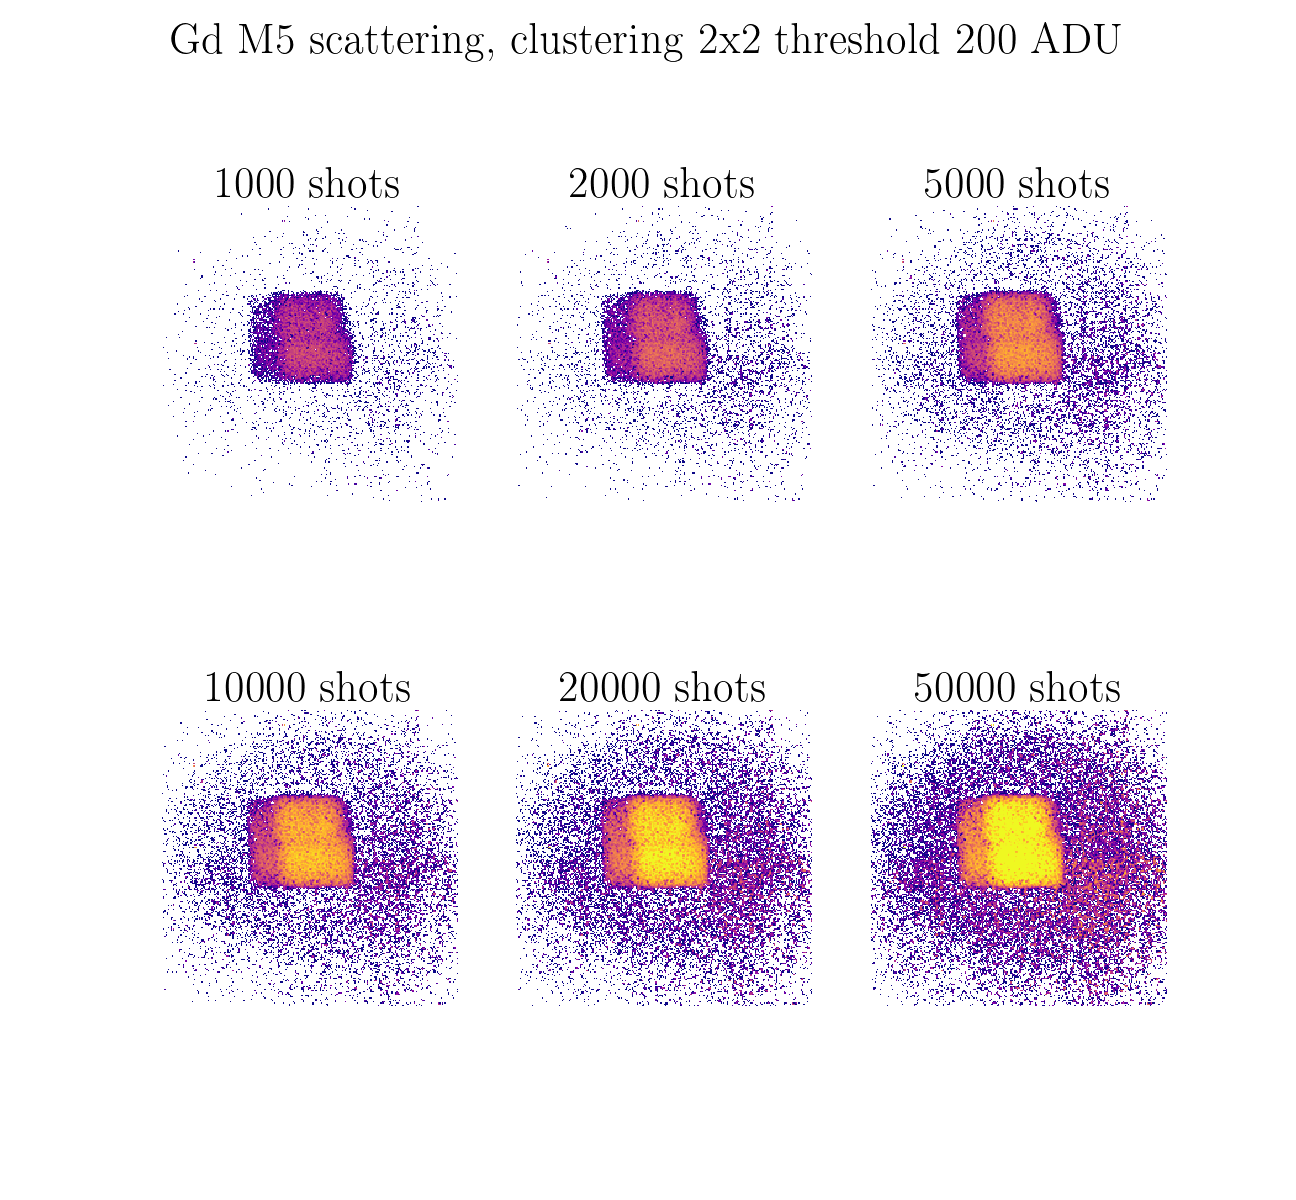

In [18]:
%matplotlib notebook
#grob

fig = plt.figure(figsize=(6.48,6))
fig.suptitle('Gd M5 scattering, clustering 2x2 threshold 200 ADU')
#fig.suptitle('MOENCH detector characteristics')
#axes.set_title('Soft X-Ray Range')
#cmap.set_bad('w', 1.)
for i in range(0,6):
    axe = fig.add_subplot(2,3,i+1)
    axe.set_title(f'{pulses[i]} shots')
    axe.axis('off')
    axe.set_xticks([]) 
    axe.set_yticks([])
    cmap = matplotlib.cm.get_cmap('plasma').copy()
    graph = th_200_resonant[i].astype(np.float64)
    graph[th_200_resonant[i] == 0] = np.nan
    im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)
#fig.colorbar(im, orientation='horizontal', fraction=0.043, pad=0.04, ax=axes, format=FuncFormatter(lambda x, pos: r"%d" % x if x != 0 else "0"))

#fig.savefig('test_ring.png', dpi=300, transparent=False)

<IPython.core.display.Javascript object>


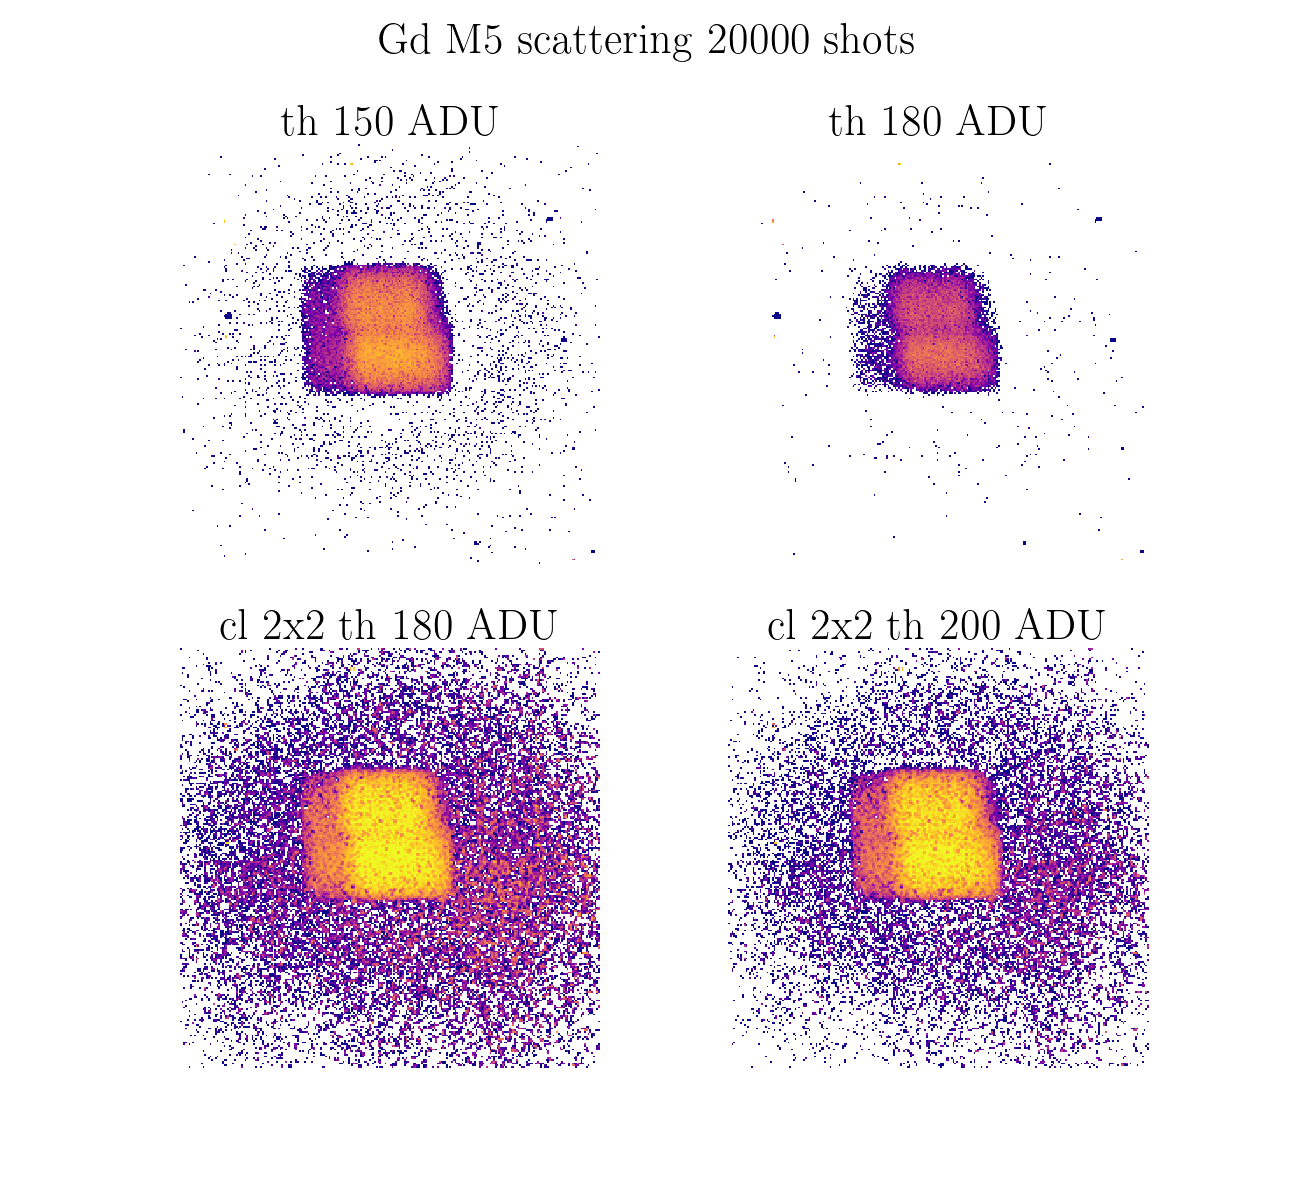

In [45]:
%matplotlib notebook
#grob

fig = plt.figure(figsize=(6.48,6))
fig.suptitle('Gd M5 scattering 20000 shots')
cmap = matplotlib.cm.get_cmap('plasma').copy()

axe = fig.add_subplot(2,2,1)
axe.set_title('th 150 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/th_150_resonance/single_count_mask_only_th_150_sum_20000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,2)
axe.set_title('th 180 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/th_180_resonance/single_count_mask_only_th_180_sum_20000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,3)
axe.set_title('cl 2x2 th 180 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/cl_2_th_180_resonance/single_count_mask_cl_2_th_180_sum_20000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,4)
axe.set_title('cl 2x2 th 200 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/cl_2_th_200_resonance/single_count_mask_cl_2_th_200_sum_20000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)
#fig.savefig('test_ring.png', dpi=300, transparent=False)

<IPython.core.display.Javascript object>


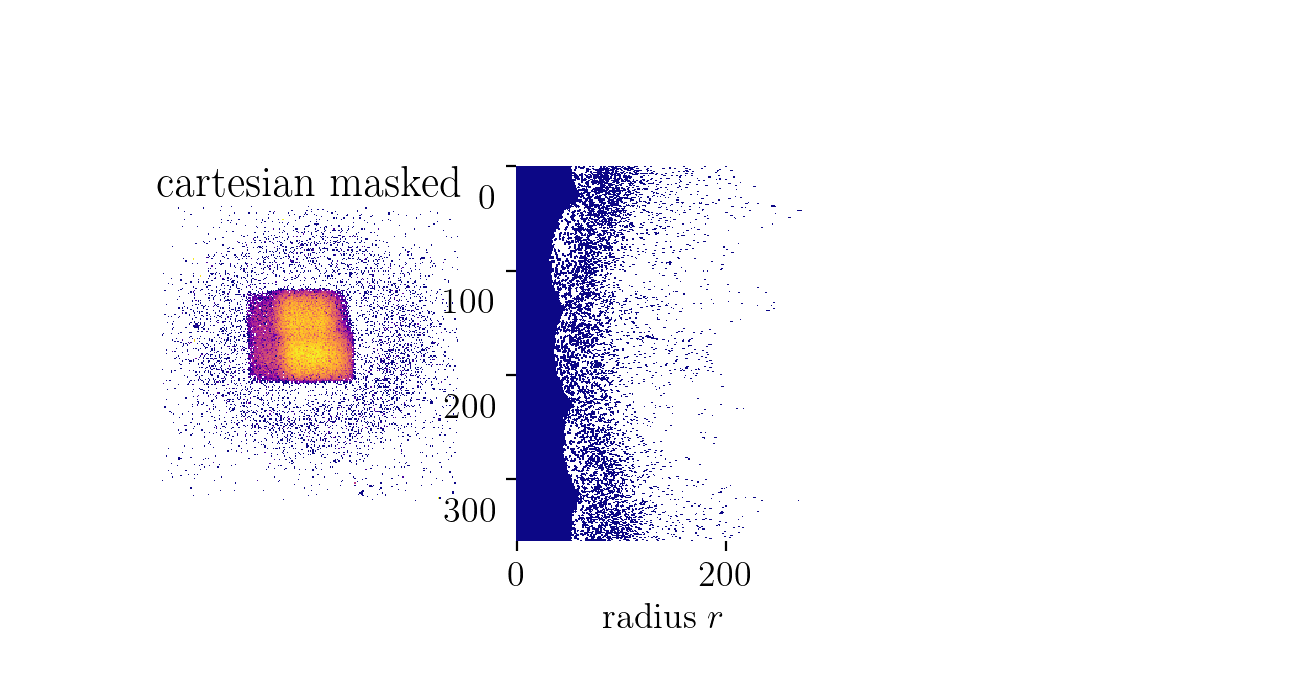

In [107]:
%matplotlib notebook
fig = plt.figure(figsize=(6.48,3.5))
fig.suptitle('Gd M5 scattering 20000 shots, th 150')
cmap = matplotlib.cm.get_cmap('plasma').copy()
image = imread('bachelorarbeit/220501_pictures/scattering/th_150_resonance/single_count_mask_only_th_150_sum_50000.tiff')
image_masked = np.array(image)
#image_masked[149:225,148:238] = 0

axe = fig.add_subplot(1,3,1)
axe.set_title('cartesian masked')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])

graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(image_masked[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)


image_polar = skimage.transform.warp_polar(image_masked,center=(192,184))

axe = fig.add_subplot(1,3,2)
axe.set_title('polar')
axe.set_xlabel('radius $r$')
axe.set_ylabel('azimutal angle $\varphi$')
graph = image_polar.astype(np.float64)
graph[image_polar == 0] = np.nan
im = axe.imshow(graph, norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(1,3,3)
axe.set_title('integration')
axe.set_xlabel('radius $r$')
axe.set_ylabel('intensity')
axe.plot(range(0,283),image_polar.sum(axis=0))

<IPython.core.display.Javascript object>


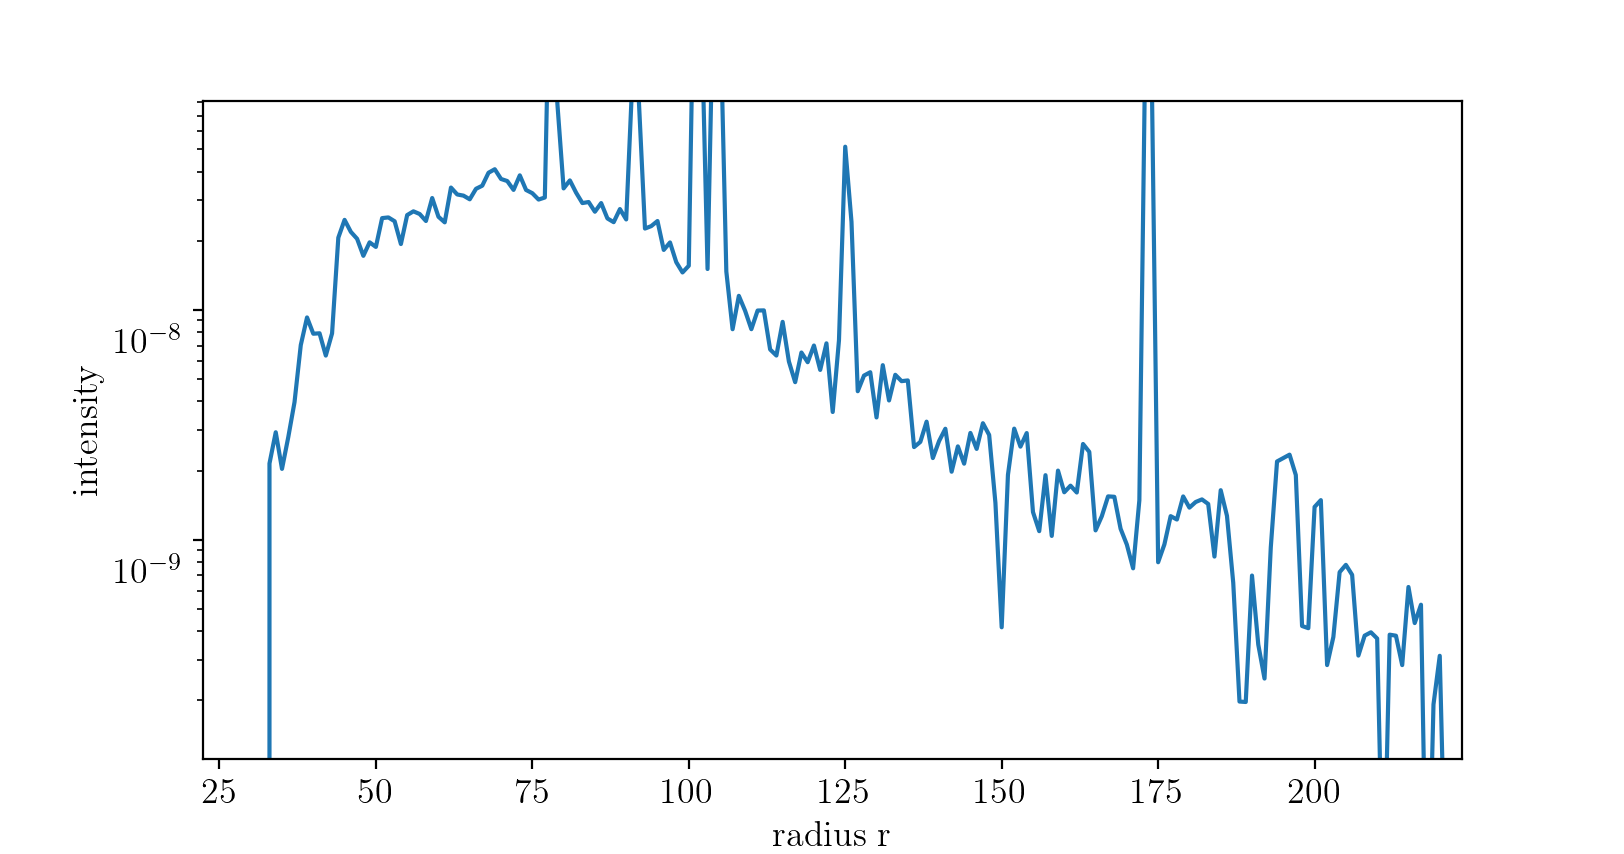

Text(0, 0.5, 'intensity')

In [104]:
%matplotlib notebook
plt.plot(range(0,283),image_polar.sum(axis=0))
plt.yscale('log')
plt.xlabel('radius r')
plt.ylabel('intensity')

<IPython.core.display.Javascript object>


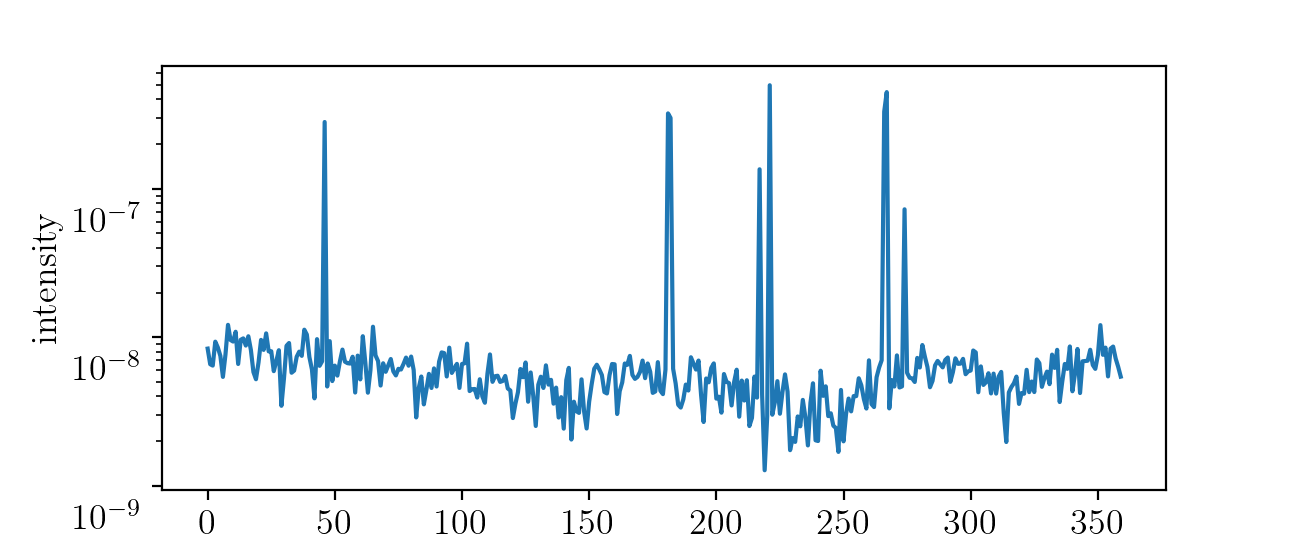

Text(0, 0.5, 'intensity')

In [105]:
%matplotlib notebook
plt.plot(range(0,360),image_polar.sum(axis=1))
plt.yscale('log')
plt.xlabel('azimutal angle phi')
plt.ylabel('intensity')

# Off resonance

<IPython.core.display.Javascript object>


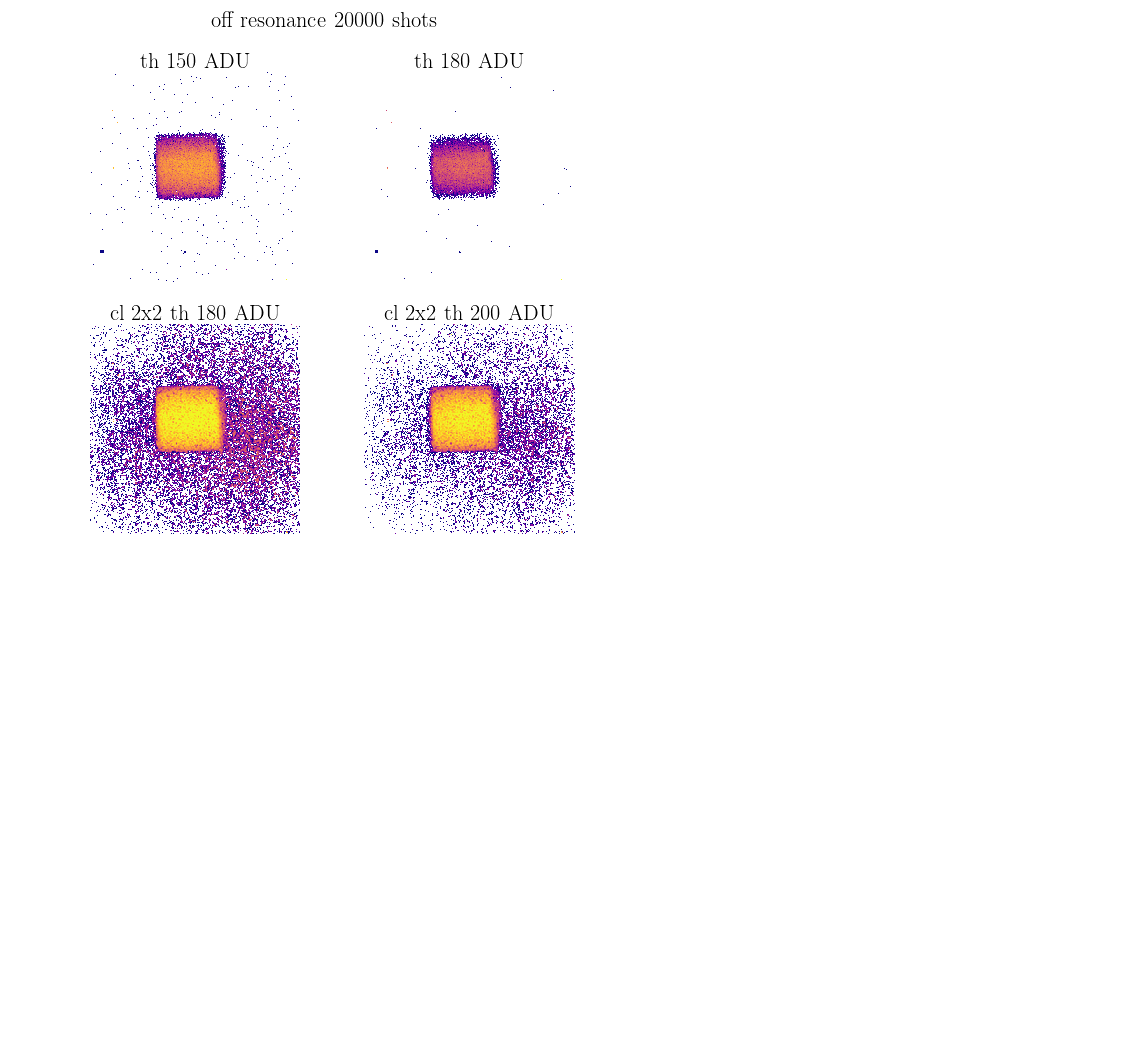

In [12]:
%matplotlib notebook
#grob

fig = plt.figure(figsize=(6.48,6))
fig.suptitle('off resonance 20000 shots')
cmap = matplotlib.cm.get_cmap('plasma').copy()

axe = fig.add_subplot(2,2,1)
axe.set_title('th 150 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/th_150_off_resonance/single_count_mask_only_th_150_sum_20000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,2)
axe.set_title('th 180 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/th_180_off_resonance/single_count_mask_only_th_150_sum_20000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,3)
axe.set_title('cl 2x2 th 180 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/cl_2_th_180_off_resonance/single_count_mask_cl_2_th_180_sum_20000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,4)
axe.set_title('cl 2x2 th 200 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/cl_2_th_200_off_resonance/single_count_mask_cl_2_th_200_sum_20000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)
#fig.savefig('test_ring.png', dpi=300, transparent=False)

# dark images

<IPython.core.display.Javascript object>


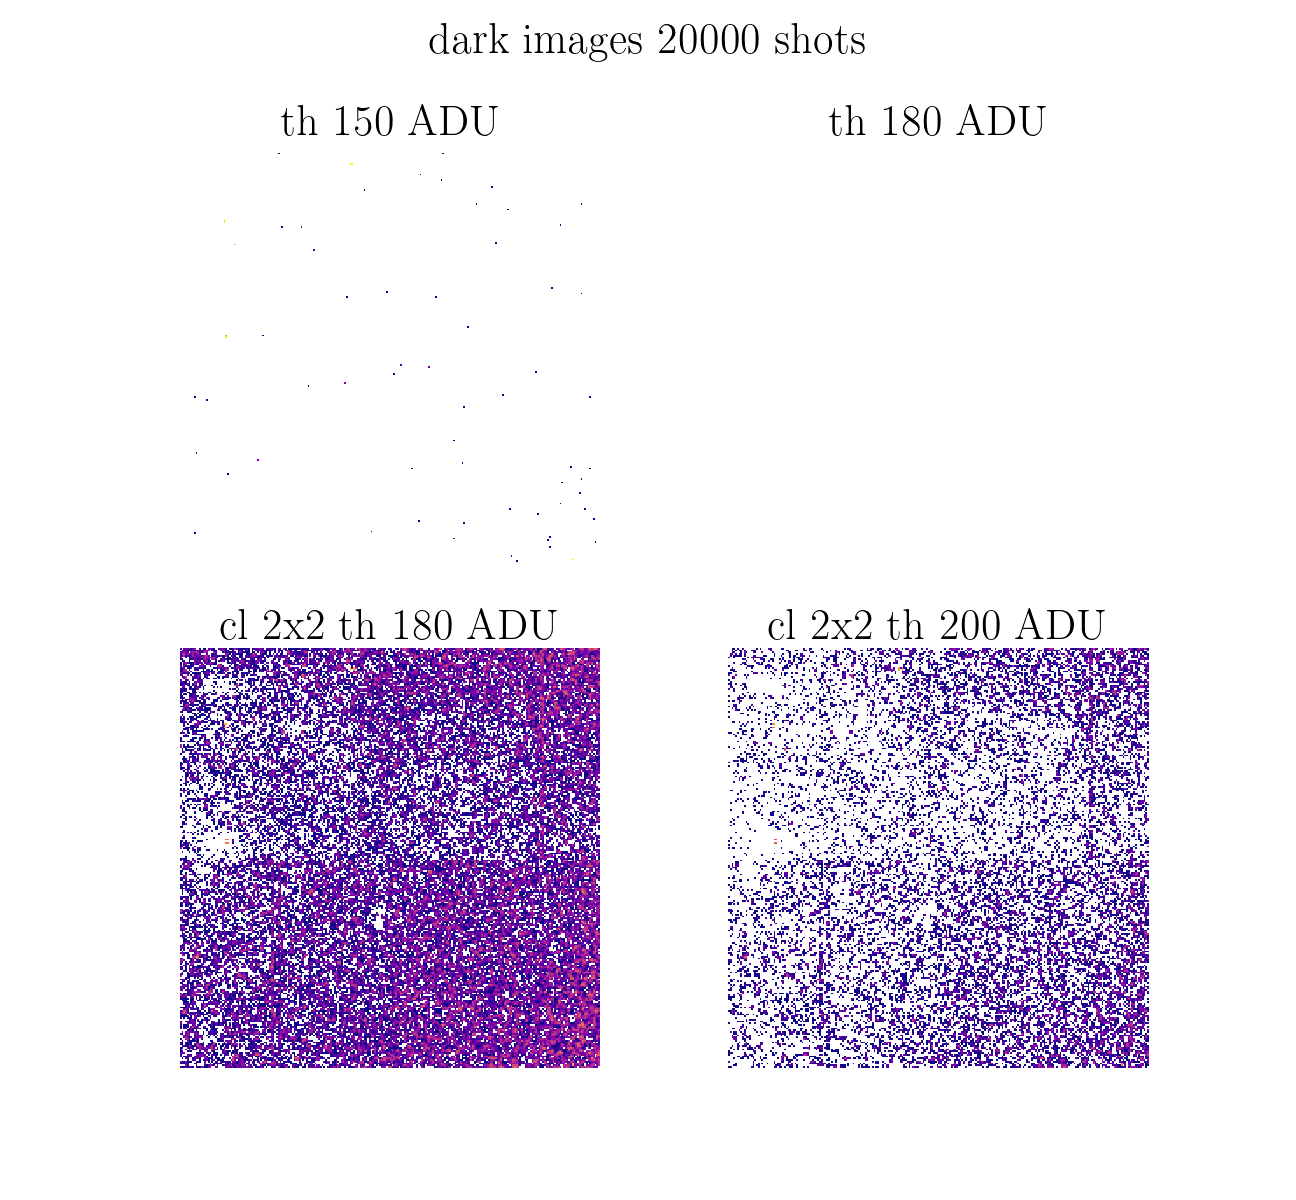

In [51]:
%matplotlib notebook
#grob

fig = plt.figure(figsize=(6.48,6))
fig.suptitle('dark images 20000 shots')
cmap = matplotlib.cm.get_cmap('plasma').copy()

axe = fig.add_subplot(2,2,1)
axe.set_title('th 150 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/th_150_dark_capture/single_count_mask_only_th_150_sum_25000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,2)
axe.set_title('th 180 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
#image = imread('bachelorarbeit/220501_pictures/scattering/th_180_off_resonance/')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
#im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,3)
axe.set_title('cl 2x2 th 180 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/cl_2_th_180_dark_capture/single_count_mask_cl_2_th_180_sum_10000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)

axe = fig.add_subplot(2,2,4)
axe.set_title('cl 2x2 th 200 ADU')
axe.axis('off')
axe.set_xticks([]) 
axe.set_yticks([])
image = imread('bachelorarbeit/220501_pictures/scattering/cl_2_th_200_dark_capture/single_count_mask_cl_2_th_200_sum_10000.tiff')
graph = image.astype(np.float64)
graph[image == 0] = np.nan
im = axe.imshow(graph[80:320, 80:320], norm=lognorm, cmap=cmap, interpolation='none', resample=False)
#fig.savefig('test_ring.png', dpi=300, transparent=False)